In [4]:
#导入 pandas 库 
import pandas as pd
# 读取 csv 数据，并保存为名称为 titanic_df 的对象 
titanic_df =pd.read_csv('./datasets//train.csv')
# 查看前 5 行 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 查看数据集基本信息 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 直接在 titanic_df 中删掉指定的列：PassengerId,Name,Ticket
titanic_df =titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
# 查看删除指定列之后的数据前 5 行 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


##### 原来有12列，删除掉3列，剩下9列。9列除去目标变量Survived，剩下8个特征变量

In [8]:
# 统计频数
Survived_freq = titanic_df.Survived.value_counts()
print(Survived_freq)

0    549
1    342
Name: Survived, dtype: int64


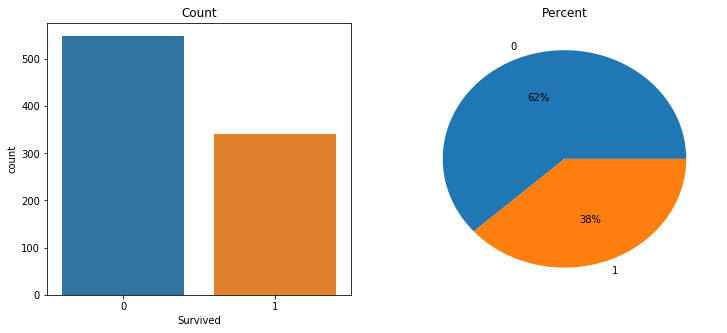

In [9]:
# 生成条图和饼图
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(Survived_freq,labels=Survived_freq.index,
autopct='%1.0f%%')
plt.title('Percent')
plt.show()

In [10]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


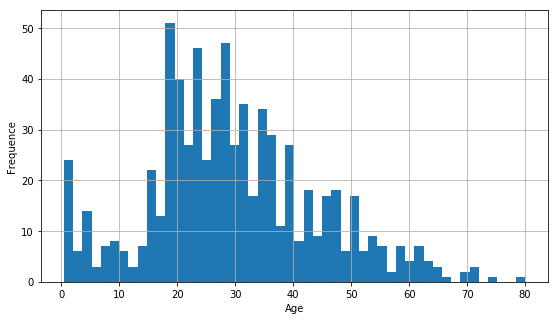

In [11]:
# Age（年龄）直方图分布
plt.figure(figsize=(20,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 50)
#使用 hist()方法，把 Age 划分为 50 个区间绘图
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

In [12]:
# 对所有数值型变量进行描述统计
titanic_df[["Age","SibSp","Parch","Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [13]:
#统计 10%,20%...100%位置的分位数
titanic_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


In [14]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


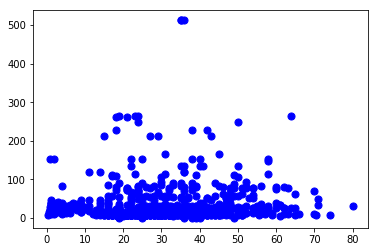

In [15]:
import matplotlib.pyplot as plt
plt.scatter(titanic_df.Age,titanic_df.Fare,50,"blue")
plt.show()

In [16]:
# Survived VS Pclass 交叉表，单元格内显示频数
pd.crosstab(titanic_df.Survived,titanic_df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


#### 从以上交叉表分析中，是否能够明显观察出客舱等级与是否生还之间的关系？

In [17]:
# Survived VS Pclass 交叉表，单元格内显示列百分比（每一列的百分比加总=100%）
pd.crosstab(titanic_df.Survived,titanic_df.Pclass) \
    .apply(lambda r: r/r.sum(), axis=1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


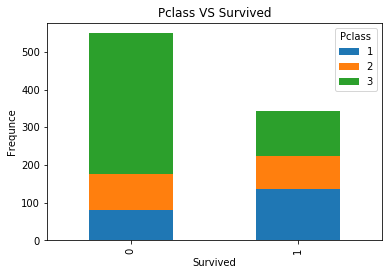

In [18]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(titanic_df.Survived,titanic_df.Pclass)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Pclass VS Survived")
plt.ylabel('Frequnce')
plt.show()

In [19]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [21]:
# 按 Survived 汇总，求 Age 和 Fare 的均值
titanic_df.groupby('Survived') \
          .agg({'Age':['max','min','mean'],'Fare':['max','min','mean']})

Age                       Fare                
           max   min       mean       max  min       mean
Survived                                                 
0         74.0  1.00  30.626179  263.0000  0.0  22.117887
1         80.0  0.42  28.343690  512.3292  0.0  48.395408

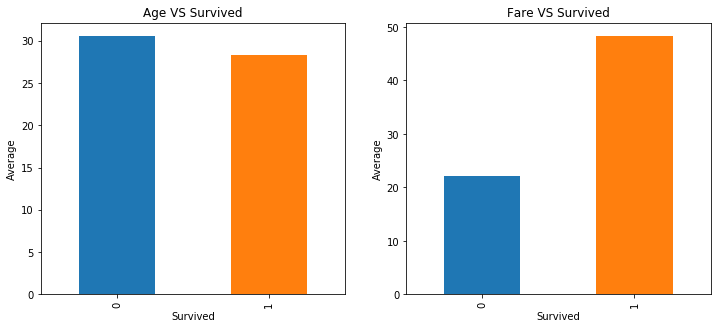

In [22]:
data = titanic_df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})

# 绘制年龄平均值柱状图
plt.figure(figsize = (12,5))
plt.subplot(121)
data.Age.plot(kind='bar')
plt.title("Age VS Survived")
plt.ylabel('Average')

# 绘制船票价格平均值柱状图
plt.subplot(122)
data.Fare.plot(kind='bar')
plt.title("Fare VS Survived")
plt.ylabel('Average')
plt.show()

In [23]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [24]:
# 删除整个数据集中任何一个变量有缺失的记录
dropna = titanic_df.dropna()
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
Survived    183 non-null int64
Pclass      183 non-null int64
Sex         183 non-null object
Age         183 non-null float64
SibSp       183 non-null int64
Parch       183 non-null int64
Fare        183 non-null float64
Cabin       183 non-null object
Embarked    183 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [26]:
# 对 Age 变量删除缺失值，保存为一个新的变量
Age_dropna = titanic_df[['Age']].dropna()
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
Age    714 non-null float64
dtypes: float64(1)
memory usage: 11.2 KB


In [27]:
# 构造一个新的变量 Age_isna,当 Age 是缺失值的时候 Age_isna=1，否则=0
titanic_df['Age_isna']=0

titanic_df.loc[titanic_df['Age'].isnull(), 'Age_isna'] = 1
# 对 Age_isna 进行频数分析，确认 Age_isna 是否构造正确
titanic_df['Age_isna'].value_counts()

0    714
1    177
Name: Age_isna, dtype: int64

In [29]:
titanic_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,0


In [30]:
titanic_df['Age'].mean()

29.69911764705882

In [34]:
# 对年龄缺失值进行均值填充
# round() 四舍五入
age_mean = round(titanic_df['Age'].mean())
# 用平均值对年龄进行填充
titanic_df['Age'].fillna(age_mean, inplace=True)
titanic_df.Age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
titanic_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
5,0,3,male,30.0,0,0,8.4583,NaN,Q,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,0


In [37]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [38]:
import pandas as pd
# 把 Pclass 进行独热编码,保存为新的数据对象,名字叫 Pclass_onehot,prefix 参数设置独热编码后的变量名前缀
Pclass_onehot = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
# 查看前 5 行 
Pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [39]:
# 对Sex进行独热编码
Sex_onehot = pd.get_dummies(titanic_df.Sex,prefix='Sex')
# 查看前 5 行 
Sex_onehot.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [40]:
# 对Embarked进行独热编码
Embarked_onehot = pd.get_dummies(titanic_df.Embarked,prefix='Embarked')
# 查看前 5 行 
Embarked_onehot.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [42]:
#对 Age 进行自定义分箱
cut_points = [0,18,25,40,60,100]

#定义分箱边界值
titanic_df["Age_bin"] = pd.cut(titanic_df.Age, bins=cut_points)
#分箱后的新变量 Age_bin 继续保存在原始的数据对象 titanic_df 中

In [47]:
# 分箱后的频数分析
# titanic_df["Age_bin"].value_counts().sort_index()
titanic_df["Age_bin"].value_counts().sort_values(ascending=False)

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: Age_bin, dtype: int64

In [49]:
# 等宽分箱，分箱数为 10
titanic_df["Age_wbin"] = pd.cut(titanic_df.Age,10)
# 分箱后的频数分析
titanic_df["Age_wbin"].value_counts().sort_index()

(0.34, 8.378]        54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    346
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age_wbin, dtype: int64

In [53]:
# 等宽分箱，每一组的宽度如何计算？
# （年龄的最大值 - 年龄的最小值）/ 分组数量
(titanic_df.Age.max() - titanic_df.Age.min())/10

7.958

In [56]:
# 等深分箱，分箱数为 5
titanic_df["Age_dbin"] = pd.qcut(titanic_df.Age,5)
# 分箱后的频数分析
titanic_df["Age_dbin"].value_counts().sort_index()

(0.419, 20.0]    179
(20.0, 28.0]     183
(28.0, 30.0]     224
(30.0, 38.0]     128
(38.0, 80.0]     177
Name: Age_dbin, dtype: int64

In [60]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"


In [61]:
# 分箱后得到的变量就变成了类别型变量（这正是我们要分箱的目的），
# 那么就可以用前面学到的独热编码的方法对分箱后的变量进行编码了。
Age_bin_onehot = pd.get_dummies(titanic_df.Age_bin,prefix='Age_bin')
Age_bin_onehot.head()

,"Age_bin_(0, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 100]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
